<a href="https://colab.research.google.com/github/VilasSonawane/Playstore_-App_Review_Analysis-/blob/main/_Vilas_Copy_of_Team_Notebook_EDA_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [8]:
import numpy as np
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
working_directory = '/content/drive/MyDrive/Data_Squad_EDA/'
app_df =pd.read_csv(working_directory + 'Play Store Data.csv')
review_df =pd.read_csv(working_directory+'User Reviews.csv')

In [11]:
# Check the structure of the application csv
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
# Check the structure of the user review csv
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [13]:
review_df.shape

(64295, 5)

In [14]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [15]:
app_df.shape

(10841, 13)

In [16]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **ND** - In the following cells we are going to explore each variable of both the data sets and write their descriptions in the data dictionary - [here](https://docs.google.com/spreadsheets/d/1wWjc7jT9jWOZaPxMlAaXPSxA90krAy3SwkazUihiZh4/edit#gid=0)

### We try to get the range of the data if it is numeric type and get the number of unique elements if it is categorical data

In [17]:
# ND
# Check the number of unique apps available in the dataset
app_df['App'].nunique()

9660

In [18]:
app_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [19]:
app_df['Category'].nunique()

34

In [20]:
app_df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [21]:
#ND
# Checking how many instances had a rating greater than 5
app_df[app_df['Rating']>5]['Rating']

10472    19.0
Name: Rating, dtype: float64

#### Only one instance had a rating of greater than 5. Also a rating of 19 seems absurd. Since it is just one instance out of 10841, we can ignore it and drop that instance

In [22]:
#ND
# Dropping the instances whose rating is greater than 5
# app_df.drop(labels=app_df[app_df['Rating']>5].index[1], inplace = True)

In [23]:
# ND
# Converting the reviews written as '3.0M' to 3000000 so that we can convert it to an integer
for index,row in app_df.iterrows():
  if 'M' in row['Reviews']:
    app_df.loc[index,'Reviews'] = float(row['Reviews'][:-1])*(10**6)

app_df['Reviews'] = app_df['Reviews'].astype(int)

In [24]:
# Checking if the data type is proper
app_df['Reviews'].dtype

dtype('int64')

In [25]:
# Since it is a numerical variable now, we can check the range of it
app_df['Reviews'].describe()

count    1.084100e+04
mean     4.443887e+05
std      2.927728e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.479800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [26]:
# ND
# Exploring the size column
app_df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [27]:
app_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [28]:
#ND
# Check how many instances have the app size expressed in MB
sum(app_df['Size'].apply(lambda x: int('M' in x)))

8829

In [29]:
#ND
# Check how many instances have the app size expressed in KB
sum(app_df['Size'].apply(lambda x: int('k' in x)))

316

In [30]:
#ND
# Check how many instances have an app size that varies with the device
sum(app_df['Size']=='Varies with device')

1695

In [31]:
#VS
# Data cleaning for "Size" column and converting M & K in to equivlant MB
 
app_df['Size'] = app_df['Size'].apply(lambda x: x.rstrip('M'))
app_df['Size'] =app_df['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)

In [32]:
app_df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '0.0', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '0.1', '8.4', '44', '0.7', '1.6', '6.2',
       '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77',
       '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36'

As we have seen above in "Size" column is having value 'Varies with device' as that value will not be having any meaning in analysis it is equivalant null value so lets convert it into null value

In [33]:
#VS
# Data cleaning for "Size" column and handeling Missing values 'Varies with device'

app_df['Size'] =app_df['Size'].apply(lambda x: np.nan if x.startswith('Varies') else x)


In [34]:
app_df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '0.0', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       '0.1', '8.4', '44', '0.7', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.

In [35]:
#Getting the information about column Size
app_df['Size'].describe()

count     9146
unique     193
top         11
freq       198
Name: Size, dtype: object

In [36]:
#Count of Null Value
sum(app_df['Size'].isnull())

1695

In [37]:
app_df['Size'].value_counts()

11        198
12        196
14        194
13        191
15        184
         ... 
84          9
89          9
86          8
90          6
1,000+      1
Name: Size, Length: 193, dtype: int64

#### So all the instances have sizes listed as MB or NaN so now no absurd Data

In [38]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [39]:
# ND
# Exploring the 'Installs' column
# Getting the list of unique buckets for number of installations
sorted(list(app_df['Installs'].unique()))

['0',
 '0+',
 '1+',
 '1,000+',
 '1,000,000+',
 '1,000,000,000+',
 '10+',
 '10,000+',
 '10,000,000+',
 '100+',
 '100,000+',
 '100,000,000+',
 '5+',
 '5,000+',
 '5,000,000+',
 '50+',
 '50,000+',
 '50,000,000+',
 '500+',
 '500,000+',
 '500,000,000+',
 'Free']

In [40]:
app_df['Installs'].nunique()

22

In [41]:
# ND
# Exploring the type column
app_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [42]:
sum(app_df['Type'].isnull())

1

#### Only one null value in the 'Type' column. We can drop it.

In [43]:
# Dropping the instance with missing 'Type' column value
app_df = app_df[~(app_df['Type'].isnull())]

In [44]:
#ND
# Exploring the price  column
app_df['Price'].nunique()

93

In [45]:
app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
# ND
# Converting the price to a float type
for index,row in app_df.iterrows():
  if '$' in row['Price']:
    app_df.loc[index,'Price'] = float(row['Price'][1:])
  else:
    app_df.loc[index,'Price'] = float(row['Price'])

app_df['Price'] = app_df['Price'].astype(float)

In [48]:
app_df['Price'].describe()

count     10840.0
unique      106.0
top           0.0
freq       9697.0
Name: Price, dtype: float64

In [49]:
#ND
# Exploring the content rating column
app_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [50]:
# ND
# Exploring the genres column
app_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [51]:
app_df['Genres'].nunique()

120

In [52]:
# ND
# Exploring the last updated column
app_df['Last Updated'].head(10)

0       January 7, 2018
1      January 15, 2018
2        August 1, 2018
3          June 8, 2018
4         June 20, 2018
5        March 26, 2017
6        April 26, 2018
7         June 14, 2018
8    September 20, 2017
9          July 3, 2018
Name: Last Updated, dtype: object

In [53]:
# ND
# Exploring the current version column
app_df['Current Ver'].head(10)

0                 1.0.0
1                 2.0.0
2                 1.2.4
3    Varies with device
4                   1.1
5                   1.0
6                   1.1
7              6.1.61.1
8                 2.9.2
9                   2.8
Name: Current Ver, dtype: object

In [54]:
# Looking at the Android version column
app_df['Android Ver'].head(10)

0    4.0.3 and up
1    4.0.3 and up
2    4.0.3 and up
3      4.2 and up
4      4.4 and up
5      2.3 and up
6    4.0.3 and up
7      4.2 and up
8      3.0 and up
9    4.0.3 and up
Name: Android Ver, dtype: object

### Exploring the user review dataset

In [55]:
review_df.shape

(64295, 5)

In [56]:
review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [57]:
# Exploring the app column
# Finding the number of unique apps in this dataset
review_df['App'].nunique()

1074

In [58]:
# Exploring the sentiment column
review_df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [59]:
# Exploring the sentiment polarity column
review_df['Sentiment_Polarity'].dtype

dtype('float64')

In [60]:
review_df['Sentiment_Polarity'].describe()

count    37432.000000
mean         0.182146
std          0.351301
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

In [61]:
# Exploring the sentiment subjectivity column
review_df['Sentiment_Subjectivity'].dtype

dtype('float64')

In [62]:
review_df['Sentiment_Subjectivity'].describe()

count    37432.000000
mean         0.492704
std          0.259949
min          0.000000
25%          0.357143
50%          0.514286
75%          0.650000
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

## Handling missing values in the app_df dataset

In [63]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9146 non-null   object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.5+ MB


In [64]:
10839-9366

1473

#### Ratings column is a key performance indicator and it has 1473 missing entries

# Current version and android version have very few missing entries which can be dropped for simplicity

In [65]:
# Dropping the missing entries in current ver and android ver columns
app_df = app_df[~((app_df['Current Ver'].isnull())|(app_df['Android Ver'].isnull()))]

In [66]:
app_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [67]:
app_df['Installs'].unique()[0]

'10,000+'

In [68]:
app_df['Numeric_Installs'] = app_df['Installs'].apply(lambda x: int(x[:-1].replace(',','')))

In [69]:
app_df['Numeric_Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Numeric_Installs, Length: 10829, dtype: int64

In [70]:
app_df.groupby(by = 'Type')[['Rating','Reviews','Installs']].mean()

,Rating,Reviews
Type,,
Free,4.186288,478992.652711
Paid,4.266822,11716.737767


In [71]:
d = app_df.groupby(by=['Installs','Numeric_Installs','Type'])[['Rating','Reviews']].mean().unstack().reset_index().sort_values(by='Numeric_Installs')
d.drop('Numeric_Installs',level = 0,axis = 1,inplace = True)
d.columns = ['Installs','Avg_Rating_Free','Avg_Rating_Paid','Avg_Reviews_Free','Avg_Reviews_Paid']

In [72]:
d.head()

,Installs,Avg_Rating_Free,Avg_Rating_Paid,Avg_Reviews_Free,Avg_Reviews_Paid
0,0+,NaN,NaN,0.000000,0.000000
1,1+,5.000000,5.000000,0.282609,0.333333
11,5+,4.611111,NaN,0.585714,0.250000
5,10+,4.664706,4.511111,0.943038,1.739130
14,50+,4.573810,3.957143,2.362573,2.411765


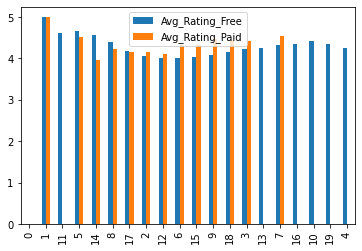

In [73]:
d[['Installs','Avg_Rating_Free','Avg_Rating_Paid']].plot(kind = 'bar')


In [74]:
# DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)
tmp = app_df.groupby(by=['Numeric_Installs','Type'])[['Rating','Reviews']].mean().reset_index().sort_values('Numeric_Installs')
tmp.rename(columns={'Rating':'Average Rating','Reviews': 'Average Number of Reviews'},inplace = True)
tmp.head(10)
free = tmp[tmp['Type']=='Free']
paid = tmp[tmp['Type']=='Paid']
print(free.shape)
print(paid.shape)
free
paid

(20, 4)
(15, 4)


,Numeric_Installs,Type,Average Rating,Average Number of Reviews
1,0,Paid,NaN,0.000000e+00
3,1,Paid,5.000000,3.333333e-01
5,5,Paid,NaN,2.500000e-01
7,10,Paid,4.511111,1.739130e+00
9,50,Paid,3.957143,2.411765e+00
11,100,Paid,4.225373,9.531250e+00
13,500,Paid,4.163889,3.220000e+01
15,1000,Paid,4.142553,1.033716e+02
17,5000,Paid,4.114925,2.881642e+02
19,10000,Paid,4.313178,1.087372e+03


In [76]:
import numpy as np

value = np.random.randint(1, 20, 10)
type = np.random.choice([0, 1, 2], 10)

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set() #make the plots look pretty

df = pd.DataFrame({'value': value, 'type': type})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()
ag
#ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
#plt.show()

type,0,1,2
value,,,
2,NaN,1.0,NaN
5,1.0,NaN,NaN
7,NaN,1.0,NaN
8,NaN,NaN,1.0
9,1.0,NaN,NaN
10,1.0,NaN,NaN
11,1.0,NaN,NaN
13,1.0,NaN,NaN
16,NaN,1.0,NaN


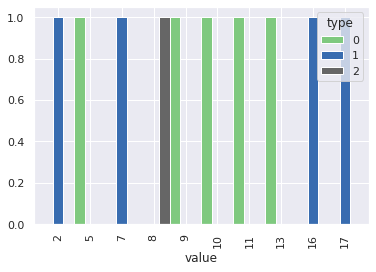

In [78]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set() #make the plots look pretty

ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()

ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

In [79]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Numeric_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000


In [80]:
#VS  In Install column let remove "+"&  "," sign from column so that we can simplify data to analyse in better way 
# Data cleaning of  "Installs" column
app_df['Installs'] = app_df['Installs'].map(lambda x: x.rstrip('+'))
app_df['Installs'] = app_df['Installs'].map(lambda x: ''.join(x.split(',')))
app_df['Installs'] = app_df['Installs'].astype(int)

In [81]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Numeric_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000


In [82]:
app_df.groupby(by = 'Type')[['Rating','Reviews','Installs']].describe()

Rating                      ...  Installs                         
       count      mean       std  ...       50%        75%           max
Type                              ...                                   
Free  8715.0  4.186288  0.512335  ...  100000.0  5000000.0  1.000000e+09
Paid   645.0  4.266822  0.548247  ...    1000.0    10000.0  1.000000e+07

[2 rows x 24 columns]

In [83]:
app_df['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10829, dtype: object

In [84]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn

In [85]:
# Que Finding the corelation between Category & rating & Review & Installs

In [86]:
#VS 
# lets apply group by function on Catagory and Reviews Columns 
Catagorywise_data=app_df.groupby(['Category'])[['Rating','Reviews','Installs']].mean()
GN1=Catagorywise_data.sort_values('Installs', axis=0, ascending=False)
GN1.rename(columns={'Rating':'Average Rating','Reviews': 'Average No Reviews','Installs': 'Average Installs'},inplace = True)
GN1

,Average Rating,Average No Reviews,Average Installs
Category,,,
COMMUNICATION,4.158537,2.107138e+06,8.435989e+07
SOCIAL,4.255598,2.105903e+06,4.769447e+07
VIDEO_PLAYERS,4.063750,6.307439e+05,3.555430e+07
PRODUCTIVITY,4.211396,2.691438e+05,3.343418e+07
GAME,4.286326,1.385859e+06,3.066960e+07
PHOTOGRAPHY,4.192114,6.373631e+05,3.011417e+07
TRAVEL_AND_LOCAL,4.109292,2.427051e+05,2.662359e+07
NEWS_AND_MAGAZINES,4.132189,1.922292e+05,2.648876e+07
ENTERTAINMENT,4.126174,3.971688e+05,1.925611e+07


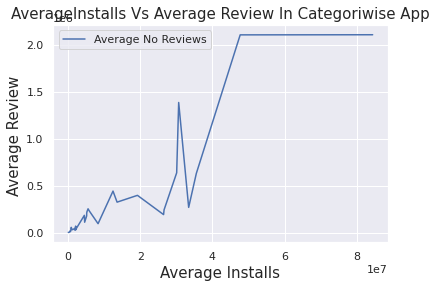

In [87]:
 #VS
 # Create the plot object Install Vs Reviews
# ax = Catagorywise_data.plot.bar(figsize = (10,5),fontsize = 14)
ax=GN1.plot.line(x="Average Installs", y= 'Average No Reviews')
# Set the title
ax.set_title("AverageInstalls Vs Average Review In Categoriwise App", fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Average Installs", fontsize = 15)
ax.set_ylabel("Average Review ", fontsize = 15)
seaborn.set() #make the plots look pretty



Text(0, 0.5, 'Average Rating')

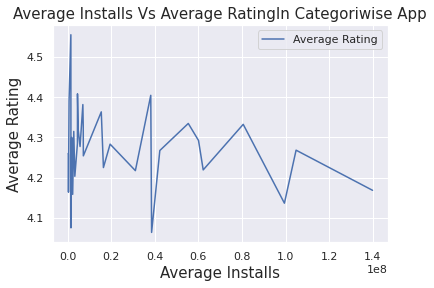

In [115]:
 # Create the plot object Install Vs Rating
# ax = Catagorywise_data.plot.bar(figsize = (10,5),fontsize = 14)
ax=GN1.plot.line(x="Average Installs", y= "Average Rating")
# Set the title
ax.set_title("Average Installs Vs Average RatingIn Categoriwise App", fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Average Installs", fontsize = 15)
ax.set_ylabel("Average Rating", fontsize = 15)


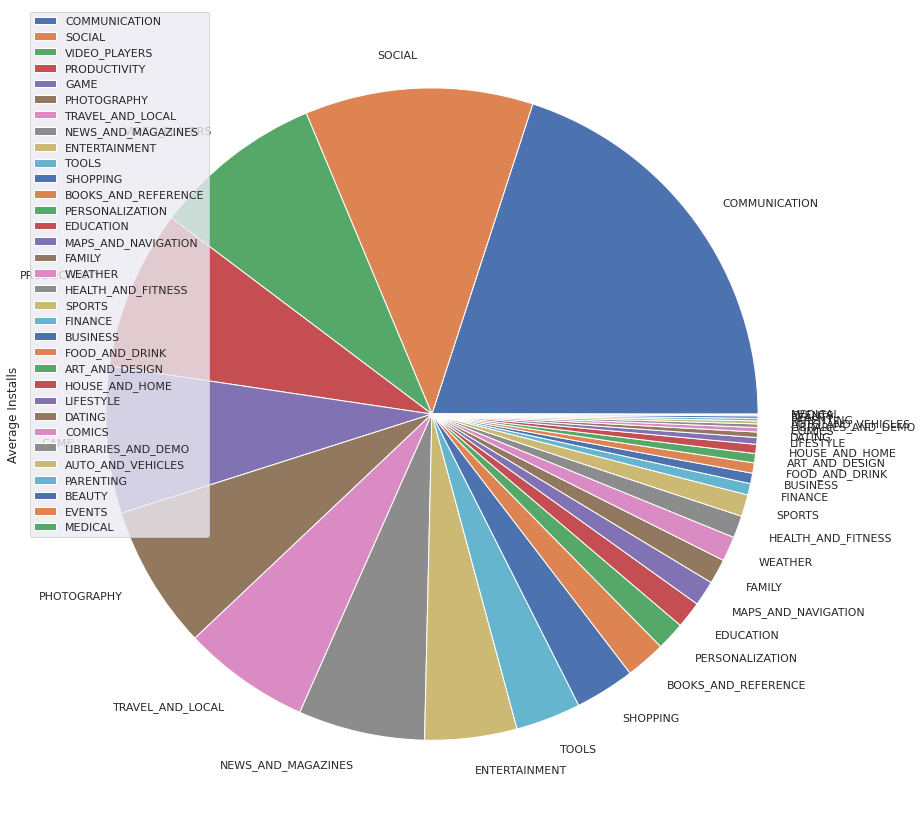

In [90]:
#VS
# lets apply group by function on Catagory and Installs Columns 
GN1.plot.pie(x='Category', y='Average Installs', figsize=(15, 15))

In [91]:
# So Now lets Join The both The dataframe and 


In [92]:
review_df.shape

(64295, 5)

In [93]:
app_df.shape

(10829, 14)

In [94]:
app_df['App'].nunique()

9648

In [95]:
#Lets find duplicate entries in App Column and dataframe
# sum(app_df.duplicated(subset='App', keep='first'))
dup= df[app_df.duplicated(keep = 'last')].reset_index()
# df[df.index.isin(dup) & df.a_col.isnull()]
dup.head()
print("Duplicate Rows :")

Duplicate Rows :


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
# Lets Drop Duplicate entries in App Columnn
app_df2=app_df.drop_duplicates(subset="App")
app_df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Numeric_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000


In [97]:
app_df.shape

(10829, 14)

In [98]:
review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [99]:
temp_review = review_df.groupby(by=['App'])[['Sentiment_Polarity','Sentiment_Subjectivity']].mean().reset_index()
temp_review.rename(columns={'Sentiment_Polarity':'Mean_Sentiment_Polarity','Sentiment_Subjectivity': 'Mean_Sentiment_Subjectivity'},inplace = True)
temp_review.shape

(1074, 3)

In [100]:
temp_review.head(2)

,App,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
0,10 Best Foods for You,0.470733,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516


In [168]:
sum(temp_review['Mean_Sentiment_Subjectivity'].isnull())

209

In [187]:
#So we are having around 209 row where apps are having null value for Mean_Sentiment_Polarity	Mean_Sentiment_Subjectivity so 
# it will better to drop those rows which are having any 2 value null or missing
temp_review=temp_review.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [188]:
sum(temp_review['Mean_Sentiment_Subjectivity'].isnull())

0

In [185]:
temp_review .describe()

,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
count,865.000000,865.000000
mean,0.200178,0.489814
std,0.163851,0.085871
min,-0.668490,0.000000
25%,0.082766,0.449354
50%,0.197993,0.495240
75%,0.300000,0.537320
max,1.000000,0.916667


In [171]:
review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [197]:
new_df=pd.merge(temp_review,app_df2, how='inner', on='App')
new_df.set_index('Category', inplace=True)
new_df.drop(['Numeric_Installs'], axis=1)
new_df.shape

(816, 15)

In [194]:
new_df.describe()

,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs,Numeric_Installs
count,816.000000,816.000000,816.000000,8.160000e+02,8.160000e+02,8.160000e+02
mean,0.200473,0.491926,4.282598,7.113919e+05,2.670946e+07,2.670946e+07
std,0.161384,0.085174,0.313643,3.640515e+06,1.099350e+08,1.099350e+08
min,-0.500000,0.000000,2.600000,1.140000e+02,1.000000e+03,1.000000e+03
25%,0.082372,0.452693,4.100000,7.777750e+03,1.000000e+06,1.000000e+06
50%,0.198221,0.497103,4.300000,4.065050e+04,3.000000e+06,3.000000e+06
75%,0.299261,0.537958,4.500000,1.983450e+05,1.000000e+07,1.000000e+07
max,1.000000,0.916667,4.900000,7.815831e+07,1.000000e+09,1.000000e+09


Text(0, 0.5, 'Installs')

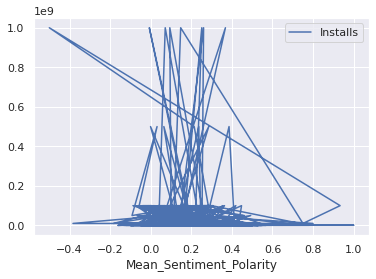

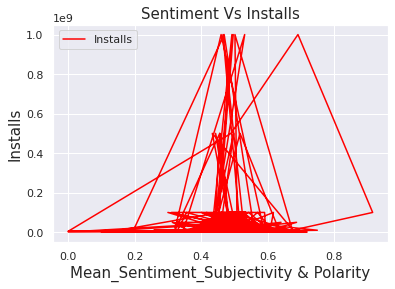

In [198]:

# Primary checking the trends for Sentiment anlyssis vs Installs
#
ax=new_df.plot.line(x="Mean_Sentiment_Polarity", y= "Installs")
ax=new_df.plot.line(x="Mean_Sentiment_Subjectivity", y= "Installs", color="red")
# Set the title
ax.set_title("Sentiment Vs Installs" , fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Mean_Sentiment_Subjectivity & Polarity", fontsize = 15)
ax.set_ylabel("Installs", fontsize = 15)


In [217]:
#VS 
# lets apply group by function on Catagory and Reviews Columns 
Catagorywise_data2=new_df.groupby(['Category'])[['Rating','Reviews','Installs','Mean_Sentiment_Polarity','Mean_Sentiment_Subjectivity']].mean()
GN2=Catagorywise_data2.sort_values('Installs', axis=0, ascending=False)
GN2.rename(columns={'Rating':'Average Rating','Reviews': 'Average No Reviews','Installs': 'Average Installs'},inplace = True)
GN2

,Average Rating,Average No Reviews,Average Installs,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
Category,,,,,
SOCIAL,4.161111,5.433886e+06,1.475889e+08,0.149642,0.479552
COMMUNICATION,4.256250,1.159565e+06,1.000000e+08,0.189158,0.489954
NEWS_AND_MAGAZINES,4.250000,1.937956e+05,6.717500e+07,0.156603,0.458257
TOOLS,4.295745,1.054740e+06,6.545106e+07,0.217449,0.466271
PHOTOGRAPHY,4.303226,9.516185e+05,5.183871e+07,0.236055,0.492453
GAME,4.396774,2.476387e+06,3.856237e+07,0.062321,0.499608
PRODUCTIVITY,4.337838,4.182806e+05,3.742162e+07,0.195325,0.480159
TRAVEL_AND_LOCAL,4.230952,2.583174e+05,3.390000e+07,0.206450,0.478398
SHOPPING,4.220000,7.498216e+05,2.137500e+07,0.197693,0.476162


Text(0.5, 0, 'Average Installs')

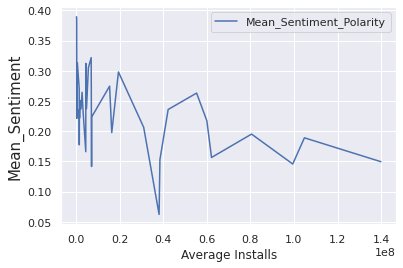

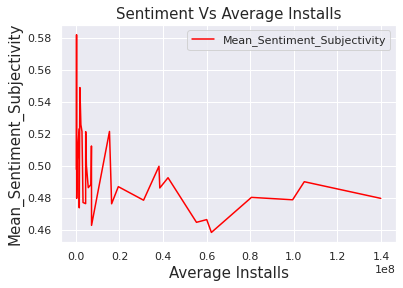

In [176]:
#VS
# Lets check Corelation between the Sentiment polarity , semtiment Subjectivty Install , Catagory Rating
# Let Plot the graph 

ax=GN2.plot.line(y="Mean_Sentiment_Polarity", x= "Average Installs")
ax.set_ylabel("Mean_Sentiment", fontsize = 15)
ax=GN2.plot.line(y="Mean_Sentiment_Subjectivity", x= "Average Installs", color="red")
# Set the title
ax.set_title("Sentiment Vs Average Installs" , fontsize = 15)

# Set x and y-labels
ax.set_ylabel("Mean_Sentiment_Subjectivity", fontsize = 15)
ax.set_xlabel("Average Installs", fontsize = 15)



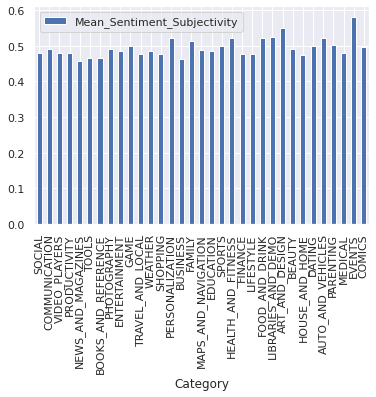

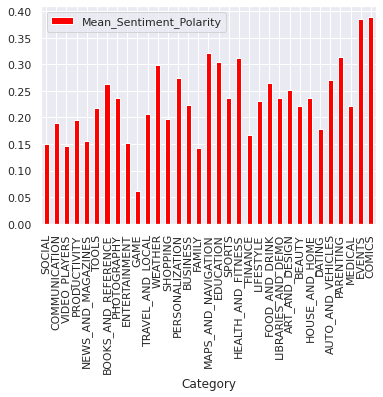

In [177]:

# ax=GN2.plot.bar(x= "Category", y="Mean_Sentiment_Subjectivity", )
GN2.plot.bar(y='Mean_Sentiment_Subjectivity')
GN2.plot.bar(y='Mean_Sentiment_Polarity',color='red')
# Set the title
# ax.set_title("Catgory vs Sentiment_Subjectivty" , fontsize = 15)

# # Set x and y-labels
# ax.set_ylabel("Mean_Sentiment_Subjectivity", fontsize = 15)
# ax.set_xlabel("Category", fontsize = 15)

In [226]:
df3=new_df.loc['SOCIAL', ['App', 'Mean_Sentiment_Polarity', 'Mean_Sentiment_Subjectivity',
       'Rating', 'Reviews', 'Installs']]

In [213]:
df3.sort_values('Installs', axis=0, ascending=True)

,App,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs,Price
Category,,,,,,,
SOCIAL,Blogaway for Android (Blogger),0.197254,0.359066,3.7,4253,100000,0
SOCIAL,Bloglovin',0.133953,0.469378,3.9,8936,500000,0
SOCIAL,All Social Networks,-0.106410,0.513820,4.2,22492,1000000,0
SOCIAL,Frontback - Social Photos,0.207096,0.461637,3.8,19446,1000000,0
SOCIAL,Family GPS tracker KidControl + GPS by SMS Loc...,0.211203,0.517123,4.5,57146,1000000,0
SOCIAL,Banjo,0.230850,0.464122,4.2,58341,1000000,0
SOCIAL,Facebook Local,0.133642,0.440459,4.2,4751,1000000,0
SOCIAL,Couple - Relationship App,0.304423,0.581324,4.0,33249,1000000,0
SOCIAL,"Hide Something - Photo, Video",0.240710,0.512799,4.6,225103,5000000,0


Text(0, 0.5, 'Installs')

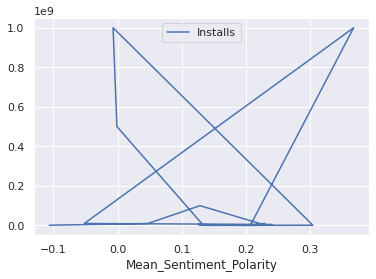

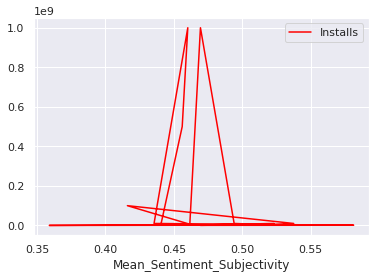

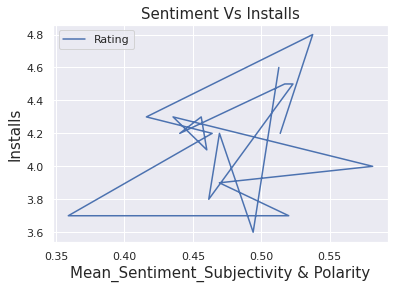

In [214]:
#  Primary checking the trends for Sentiment anlyssis vs Installs for Social Catagory
#
ax=df3.plot.line(x="Mean_Sentiment_Polarity", y= "Installs")
ax=df3.plot.line(x="Mean_Sentiment_Subjectivity", y= "Installs", color="red")
ax=df3.plot.line(x="Mean_Sentiment_Subjectivity", y="Rating")
# Set the title
ax.set_title("Sentiment Vs Installs" , fontsize = 15)


# Set x and y-labels
ax.set_xlabel("Mean_Sentiment_Subjectivity & Polarity", fontsize = 15)
ax.set_ylabel("Installs", fontsize = 15)

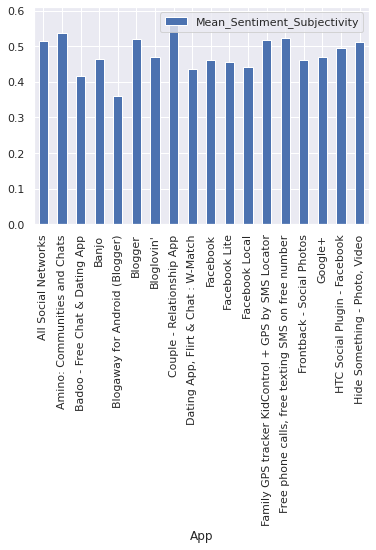

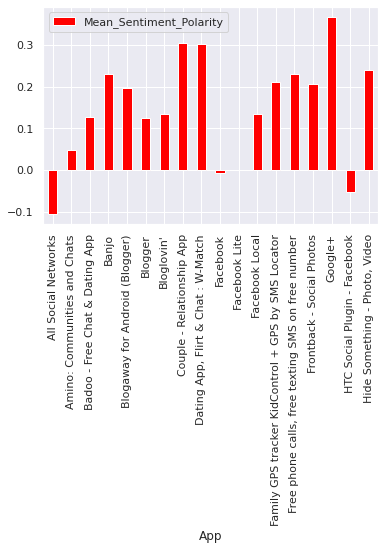

In [219]:
# ax=GN2.plot.bar(x= "Category", y="Mean_Sentiment_Subjectivity", )
df3.plot.bar(x='App', y='Mean_Sentiment_Subjectivity')
df3.plot.bar(x='App',y='Mean_Sentiment_Polarity',color='red')
# Set the title
# ax.set_title("Catgory vs Sentiment_Subjectivty" , fontsize = 15)

# # Set x and y-labels
# ax.set_ylabel("Mean_Sentiment_Subjectivity", fontsize = 15)
# ax.set_xlabel("Category", fontsize = 15

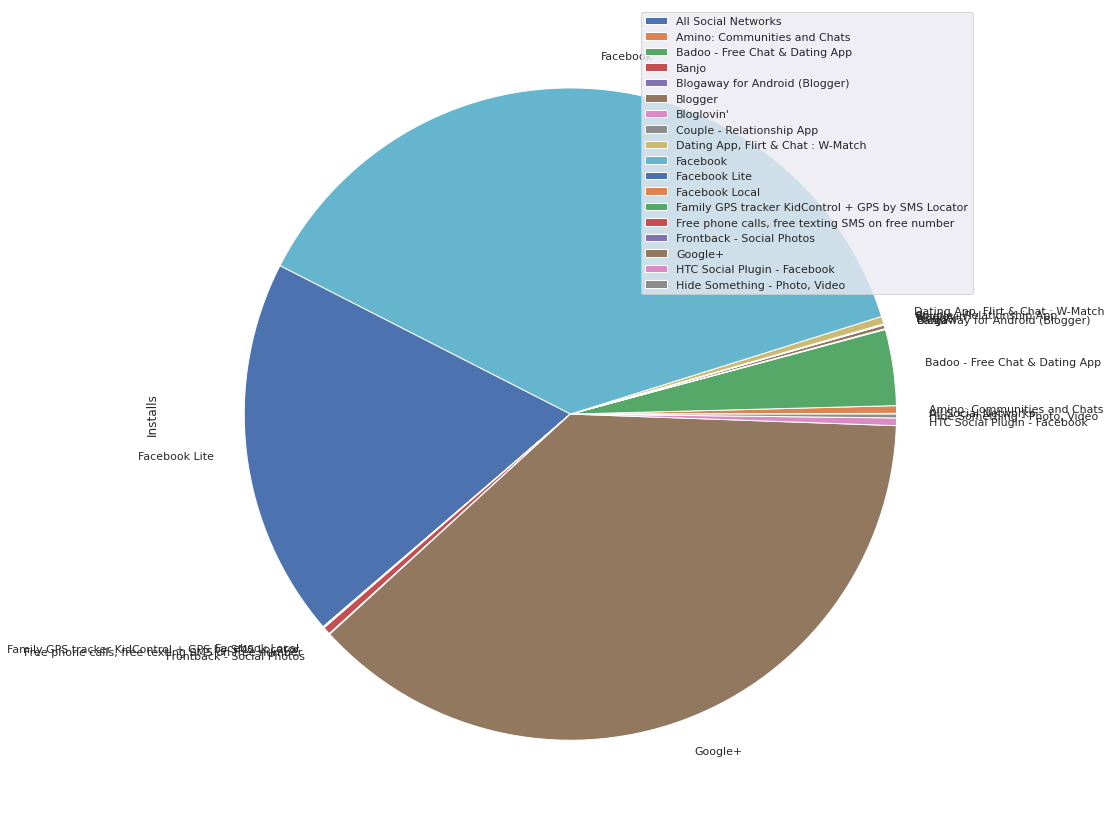

In [238]:
#VS
# lets check the market share of apps with help of pie chart
df3.plot.pie(x='App', y='Installs', figsize=(15, 15))

In [225]:
df4=new_df.loc['COMMUNICATION', ['App', 'Mean_Sentiment_Polarity', 'Mean_Sentiment_Subjectivity',
       'Rating', 'Reviews', 'Installs']]
df4.sort_values('Installs', axis=0, ascending=True)

,App,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Reviews,Installs
Category,,,,,,
COMMUNICATION,2ndLine - Second Phone Number,0.168968,0.377023,4.2,15880,1000000
COMMUNICATION,All Email Providers,0.215000,0.606667,4.1,20901,1000000
COMMUNICATION,Firefox Focus: The privacy browser,0.209249,0.553828,4.4,36880,1000000
COMMUNICATION,Caller ID +,0.350000,0.600000,4.0,9498,1000000
COMMUNICATION,Burner - Free Phone Number,0.065301,0.636111,4.3,14873,1000000
COMMUNICATION,Full Screen Caller ID,0.345576,0.476662,4.2,104990,5000000
COMMUNICATION,Calls & Text by Mo+,0.466667,0.545833,4.2,83239,5000000
COMMUNICATION,Call Control - Call Blocker,-0.041667,0.291667,4.4,93825,5000000
COMMUNICATION,Chrome Dev,0.333793,0.520779,4.4,63543,5000000


Text(0, 0.5, 'Installs')

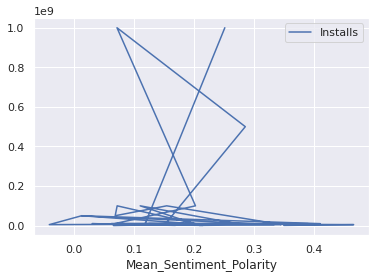

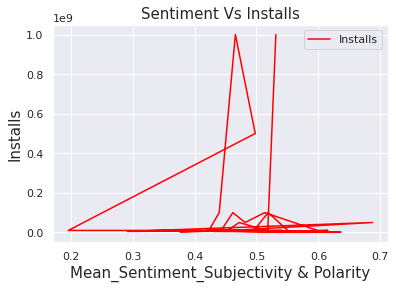

In [222]:
#  Primary checking the trends for Sentiment anlyssis vs Installs for Social Catagory
#
ax=df4.plot.line(x="Mean_Sentiment_Polarity", y= "Installs")
ax=df4.plot.line(x="Mean_Sentiment_Subjectivity", y= "Installs", color="red")
# Set the title
ax.set_title("Sentiment Vs Installs" , fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Mean_Sentiment_Subjectivity & Polarity", fontsize = 15)
ax.set_ylabel("Installs", fontsize = 15)

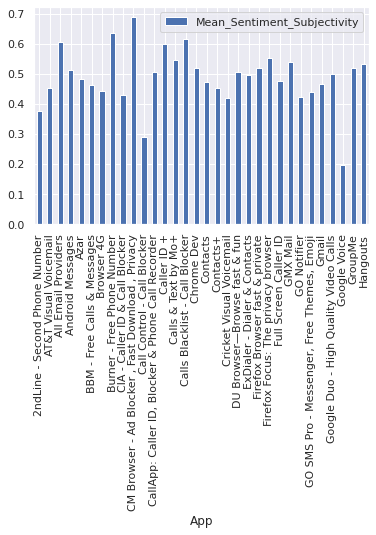

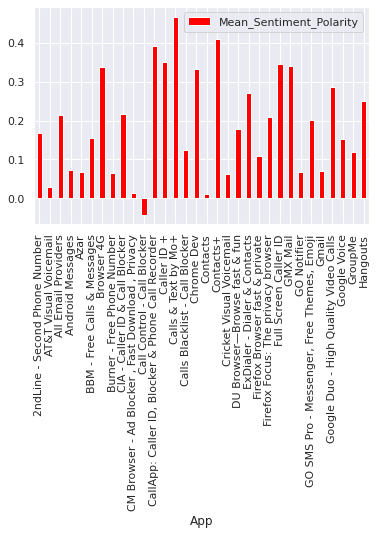

In [223]:
# ax=GN2.plot.bar(x= "Category", y="Mean_Sentiment_Subjectivity", )
df4.plot.bar(x='App', y='Mean_Sentiment_Subjectivity')
df4.plot.bar(x='App',y='Mean_Sentiment_Polarity',color='red')
# Set the title
# ax.set_title("Catgory vs Sentiment_Subjectivty" , fontsize = 15)

# # Set x and y-labels
# ax.set_ylabel("Mean_Sentiment_Subjectivity", fontsize = 15)
# ax.set_xlabel("Category", fontsize = 15

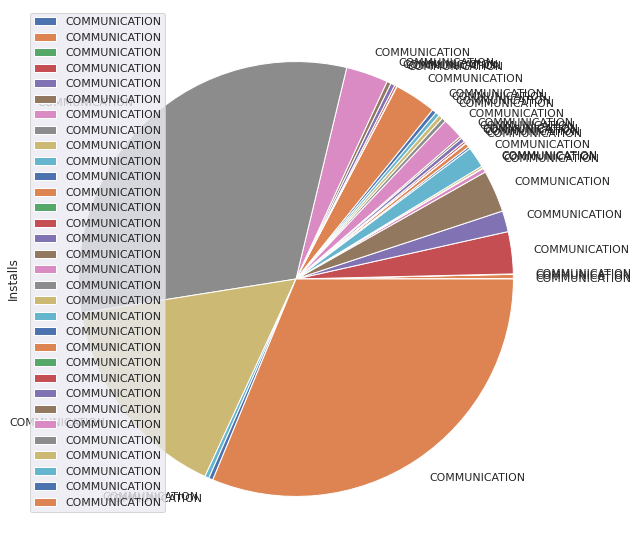

In [253]:
# lets check the market share of apps with help of pie chart
df4.plot.pie(x="App", y='Installs', figsize=(10,10))

In [ ]:
df3.set_index('App', inplace=True)

In [248]:
# Drawing Heatmap for apps in catagory of Social Apps
df5=df3.drop(['Reviews'], axis=1)
df5.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity,Rating,Installs
App,,,,
All Social Networks,-0.106410,0.513820,4.200000,1000000
Amino: Communities and Chats,0.047590,0.537536,4.800000,10000000
Badoo - Free Chat & Dating App,0.128489,0.416103,4.300000,100000000
Banjo,0.230850,0.464122,4.200000,1000000
Blogaway for Android (Blogger),0.197254,0.359066,3.700000,100000
Blogger,0.125126,0.520055,3.700000,5000000
Bloglovin',0.133953,0.469378,3.900000,500000
Couple - Relationship App,0.304423,0.581324,4.000000,1000000
"Dating App, Flirt & Chat : W-Match",0.301667,0.435556,4.300000,10000000


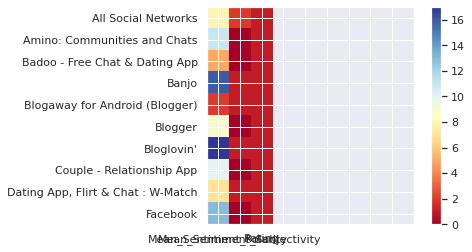

In [237]:
# Displaying dataframe as an heatmap
# with diverging colourmap as RdYlBu
df6=df3.drop(['Reviews','Installs'], axis=1)
plt.imshow(df, cmap ="RdYlBu")
df6.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '50px'})  
# Displaying a color bar to understand
# which color represents which range of data
plt.colorbar()
  
# Assigning labels of x-axis 
# according to dataframe
plt.xticks(range(len(df)), df6.columns)
  
# Assigning labels of y-axis 
# according to dataframe
plt.yticks(range(len(df)), df6.index)
  
# Displaying the figure
plt.show()